(256, 256, 150)


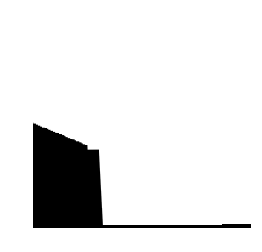

In [42]:
from __future__ import division
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
# Normal
# # GT Mask
# # Predicted Mask 
# norm_data = mr_img_normal.get_data()
# def_data = mr_img_defaced.get_data()
# mask_data = mr_img_pred.get_data()
# print(norm_data.shape)
# print(def_data.shape)
# print(mask_data.shape)
# name = 'ICBM_UCLA_1941_MR_SAG_MPRAGE_8_CHANNEL_br_raw_20090810092735719_1_S72160_I152752.nii'
# title = '../ICBM/%s' % (name)

# norm_img  = nib.load(title)
# defaced_img = nib.load(title.replace(".nii", "_defaced.nii"))
# mask_img = title.replace(".nii", "_mask.nii")
# mask_img = mask_img.replace('ICBM/', "ICBM/masks/")
#IXI414-Guys-0957-T1_mask.nii.gz


mask_img = nib.load('../data/IXI533-Guys-1066-T1_mask.nii.gz')

# nib.nifti1.Nifti1Header(mask_img)  
# print((mask_img))
# mask_img = nib.load("/home/akhazane/Project/ARFF-CNN/ICBM/masks/ICBM_UTHC_2009_MR_MPRAGE_T1_AX_0.8_mm_TI-808_br_raw_20090619051618871_1_S69046_I146508_mask.nii") 


# print(norm_img.shape)
mask_img = np.squeeze(mask_img.get_data())
print(mask_img.shape)
# defaced_img = np.swapaxes(np.squeeze(defaced_img.get_data()), 0, -1)
# norm_img = np.swapaxes(np.squeeze(norm_img.get_data()), 0, -1)
# print(norm_img.shape)

show_slice(mask_img[:, :, 75])


In [1]:
import os
import matplotlib.gridspec as gridspec

files = os.listdir('../test_predictions2')
def mask_images(files):
#     slices = [] 
    dices = [] 
    precisions = []
    recalls = [] 
    for index,filez in enumerate(files[17:]):
        print(filez)
        pred_mask = nib.load("../test_predictions2/" + filez) 
        norm_img = nib.load("../test_set_mri/" + filez.replace('_defaced_pred', ''))
        def_img = nib.load("../test_set_mri/" + filez.replace('_defaced_pred', '_defaced'))


        def_img = resize_image(np.swapaxes(def_img.get_data(), 0, -1))
        norm_image = resize_image(np.swapaxes(norm_img.get_data(), 0, -1))

        gt_mask = np.swapaxes(getMaskData(norm_image, def_img), 0, -1)
        norm_image = np.swapaxes(norm_image, 0, -1) 

        norm_img = np.swapaxes(resize_image(np.swapaxes(norm_img.get_data(), 0, -1)), 0, -1)
        pred_mask = np.swapaxes(np.squeeze(pred_mask.get_data()), 0, -1)
        low_indices = pred_mask < 0.5
        high_indices = pred_mask >= 0.5
        pred_mask[low_indices] = 0
        pred_mask[high_indices] = 1
        show_slice(pred_mask[:, :, 75])
        return
        
mask_images(files)

IXI057-HH-1342-T1_defaced_pred.nii


NameError: global name 'nib' is not defined

IXI395-IOP-0969-T1_defaced_pred.nii
(-16109.288596689701, 0.10048235207796097)


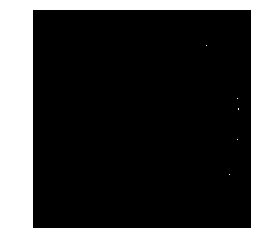

In [19]:
mask_images(files[5:10]) 

In [ ]:
mask_images(files[10:15]) 

In [ ]:
mask_images(files[15:20]) 

In [ ]:
mask_images(files[25:30]) 

In [ ]:
mask_images(files[30:35]) 

In [ ]:
mask_images(files[35:40]) 

In [ ]:
mask_images(files[40:45]) 

In [ ]:
mask_images(files[45:50]) 

In [172]:
import os
dire = 'data'
masks = os.listdir('../MRI_Images') 
norms = os.listdir('../data') 

sets = 508
shitty_masks = [449, 32, 292, 508, 273, 545, 579] 

for file in shitty_masks:
    print(masks[file]) 
    
    
# def test():
#     for index, file in enumerate(masks):
#         if sets >= 0:
#             file = masks[sets]
#             norm_filename = file.replace('_defaced', '') 
#             def_img = nib.load('../MRI_Images/' + file).get_data() 
#             norm_img = nib.load('../data/' + norm_filename).get_data() 
#             subtraction_img = norm_img - def_img 
#             print(sets, np.where(subtraction_img[:, :, :75] < 0)[0][:10])
#             print(sets, np.where(subtraction_img[:, :, :75] < 0)[1][:10])
#             print(sets, np.where(subtraction_img[:, :, :75] < 0)[2][:10])

#             show_slice(def_img[:, :, 75]) 
#             return

#         norm_filename = file.replace('_defaced', '') 
#         def_img = nib.load('../MRI_Images/' + file).get_data() 
#         norm_img = nib.load('../data/' + norm_filename).get_data() 
#         subtraction_img = norm_img - def_img 
#         ranges = np.where(subtraction_img[:, :, :75] < 0)[1][:10]
#         if len(ranges[ranges < 50]):
#             print(index, np.where(subtraction_img[:, :, :75] < 0)[0][:10])
#             print(index, np.where(subtraction_img[:, :, :75] < 0)[1][:10])
#             print(index, np.where(subtraction_img[:, :, :75] < 0)[2][:10])
#             print('-------------------------------')
# #         print(ranges, ranges[ranges >= 30])
# #         if len(ranges[ranges >= 30]):
# #             print(index, np.where(subtraction_img[:, :, :75] < 0)[0][:10])

   
# test() 

    


IXI204-HH-1651-T1_defaced.nii.gz
IXI621-Guys-1100-T1_defaced.nii.gz
IXI292-IOP-0877-T1_defaced.nii.gz
IXI308-Guys-0884-T1_defaced.nii.gz
IXI662-Guys-1120-T1_defaced.nii.gz
IXI336-Guys-0904-T1_defaced.nii.gz
IXI417-Guys-0939-T1_defaced.nii.gz


In [48]:
import os 
def validation_search():
    files = os.listdir('../test_predictions2')
    thresholds = [0.60, 0.70, 0.80]
    best_threshold_so_far = None
    best_threshold_value_so_far = None
    for threshold in thresholds:
        dices = [] 
        for filez in files[5:]:
            pred_mask = nib.load("../test_predictions2/" + filez)
#             norm_img = nib.load("../validation_set/" + filez.replace('_defaced_pred', '')).get_data() 
            def_img = nib.load("../data/" + filez.replace('_defaced_pred.nii', '_mask.nii.gz')).get_data()

            
            def_img = resize_image(np.swapaxes(def_img, 0, -1))
            def_img = np.swapaxes(def_img, 0, -1) 
        
        


            pred_mask = pred_mask.get_data()

            pred_mask = np.squeeze(pred_mask)
            pred_mask = np.swapaxes(pred_mask, 0, -1) 

            
#             pred_mask[pred_mask < 0.5] = 0 
#             pred_mask[pred_mask >= 0.5] = 1


#             print(pred_mask.shape, def_img.shape)
            dc = dice_coef(def_img, pred_mask, threshold)


            dices.append(dc)
        avg_dice = np.mean(dices)
        print(threshold, avg_dice) 
#         print(avg_dice)
        if best_threshold_value_so_far and avg_dice < best_threshold_value_so_far:
            best_threshold_value_so_far = avg_dice
            best_threshold_so_far = threshold
        elif not best_threshold_value_so_far:
            best_threshold_value_so_far = avg_dice
            best_threshold_so_far = threshold
    #     print(alternative_mask.shape, norm_data.shape)
    # # alternative_mask[alternative_mask < 0] = 0 
    # # alternative_mask[alternative_mask > 0] = 1



    print('BEST', best_threshold_value_so_far, best_threshold_so_far)
validation_search()

(0.6, 0.7210933572846073)
(0.7, 0.7199414749821362)
(0.8, 0.7012025992435774)
('BEST', 0.7012025992435774, 0.8)


In [ ]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from metrics import dice_coefficient

In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def rec_score(mask_true, mask_pred, threshold = 0.5):
    # Use threshold to create a mask of 1s and 0s 
    low_indices = mask_pred < threshold 
    high_indices = mask_pred >= threshold
    mask_pred[low_indices] = 0
    mask_pred[high_indices] = 1
#     mask_pred[mask_pred >= threshold] = 1.0
#     mask_pred[mask_pred < threshold] = 0.0
    
    # Invert the values so mask is 1 else 0
    inv_mask_true = 1.0-mask_true
    inv_mask_pred = 1.0-mask_pred
    mask_points = np.sum(inv_mask_true == 1.0)
    #print(np.unique(inv_mask_pred))
    #gt = list(inv_mask_true)
    # Compute Dice Coeff
    rec = recall_score((inv_mask_true==1.0).flatten(), (inv_mask_pred==1.0).flatten())
    return rec


''' Precision Score '''
def prec_score(mask_true, mask_pred, threshold = 0.5):
    # Use threshold to create a mask of 1s and 0s 
    low_indices = mask_pred < threshold 
    high_indices = mask_pred >= threshold
    mask_pred[low_indices] = 0
    mask_pred[high_indices] = 1
    # Invert the values so mask is 1 else 0
    inv_mask_true = 1.0-mask_true
    inv_mask_pred = 1.0-mask_pred
    mask_points = np.sum(inv_mask_true == 1.0)
    #print(np.unique(inv_mask_pred))
    #gt = list(inv_mask_true)
    # Compute Dice Coeff
    prec = precision_score((inv_mask_true==1.0).flatten(), (inv_mask_pred==1.0).flatten())
    return prec

def dice_coef(mask_true, mask_pred, threshold = 0.5):
    # Use threshold to create a mask of 1s and 0s
    low_indices = mask_pred < threshold
    high_indices = mask_pred >= threshold
    mask_pred[low_indices] = 0
    mask_pred[high_indices] = 1
    # Invert the values so mask is 1 else 0
    inv_mask_true = 1.0-mask_true
    inv_mask_pred = 1.0-mask_pred
    # Compute Dice Coeff
    d = ((2.0 * np.sum( inv_mask_pred[inv_mask_true == 1.0]) /
          (np.sum(inv_mask_true) + np.sum(inv_mask_pred) + 1e-9)))
    return d  


def resize_image(image):
    new_dims = tuple((image.shape[0] + (160 - image.shape[0]), image.shape[1], image.shape[2]))
    new_image = np.zeros(new_dims)
    new_image[:image.shape[0], :image.shape[1], :image.shape[2]] = image 
    return new_image

def normalize_img(image):
    means = np.mean(image)
    mins = np.min(image)
    maxs = np.max(image)
    norm_img = (image - means) / (maxs - mins + 1e-7)
    return norm_img 

def normalize_img_2(image):
    mins = np.min(image)
    maxs = np.max(image)
    return (image - mins) / (maxs - mins + 1e-7) 
    

def denormalize_img(pred_img, maxs, mins, means):
    return (pred_img * (maxs - mins + 1e-7)) + means

def getMaskData(normal, defaced):
    normalized_norm = ((normal - np.min(defaced))/
                      (np.max(normal)-np.min(defaced)))
    delta = defaced - normalized_norm
    delta[delta >= 0] = 1.0
    delta[delta < 0] = 0.0
    return delta

In [8]:
# Compute dice coef. 
def_data = np.swapaxes(def_data, 0, -1)
mask_data = np.squeeze(mask_data)
def_data = resize_image(def_data) 
# mask_data = normalize_img(mask_data)
def_data = normalize_img(def_data)
print(np.min(def_data), np.max(def_data)) 
print(np.min(mask_data), np.max(mask_data)) 
# print(mask_data.shape)
# print(def_data.shape)
# alternative_mask = mask_data.copy() 

# # print(np.percentile(mask_data, 70)) 
print('M S E : ', ((mask_data - def_data) ** 2).mean())

NameError: name 'def_data' is not defined

In [9]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    plt.axis('off')
    fig, axes = plt.subplots(len(slices), 2, figsize=(200,200))
#     fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    gs1 = gridspec.GridSpec(200,200) 
    gs1.update(wspace=1)
    axes_index = 0
    for i, slice in enumerate(slices):
        axes[axes_index][0].imshow(slice[0][1], cmap="gray", origin="lower")
        axes[axes_index][0].set_title(slice[0][0], {'fontsize': 120})
        axes[axes_index][1].imshow(slice[1][1].T, cmap="gray", origin="lower")
        axes[axes_index][1].set_title(slice[1][0], {'fontsize': 120}) 
        axes_index += 1


    

def show_slice(slice):
    plt.axis('off')
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    mean_val = np.mean(x) 
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-mean_val)/(max_val-min_val + 1e-7)
    return norm_x


In [ ]:
print(np.logspace(-10, -1, num=20))

print(alternative_mask.shape) 
norm_output = np.swapaxes(resize_image(np.swapaxes(norm_data, 0, -1)), 0, -1) 
defaced_output = np.swapaxes(alternative_mask, 0, -1) 
defaced_output = alternative_mask * norm_output 

def_data = np.swapaxes(def_data, 0, -1) 
def_data = np.swapaxes(resize_image(def_data), 0, -1)
print(defaced_output.shape, def_data.shape)


show_slice(defaced_output[:, :, 75])

defaced_output = normalize_img(defaced_output)
def_data = normalize_img(def_data)

print('M S E : ', ((defaced_output - def_data) ** 2).mean())

In [ ]:
#norm_arr = [#norm_data2[127, :, :],
            #norm_data2[:, 127, :],
            #norm_data2[:, :, 74]]
norm = norm_data
show_slice(norm[:, :, 75])

In [ ]:
show_slice(def_data[:, :, 75])
print(np.max(mask_data))
print(np.min(mask_data))
print(len(np.where(mask_data == 1)[0])/np.prod(mask_data.shape))

In [ ]:
# Predicted
print(mask_data.shape)
mask_data = np.squeeze(mask_data)
mask_data = np.swapaxes(mask_data, 0, -1)
show_slice(mask_data[:, :, 75])
print(np.min(mask_data))
print(np.max(mask_data))
print(np.median(mask_data))
# print(np.percentile(pmask_data, 75))
# print(len(np.where(pmask_data == 1)[0]))

In [ ]:
norm = norm_data
show_slice(norm)

In [ ]:
# Produce masked input via predicted mask
pred_applied_mask = np.multiply(normalizeImg(pmask_data[:, :, 0]), norm)


show_slice(pred_applied_mask)

In [ ]:
applied_mask = np.multiply(mask_data, norm)
show_slice(applied_mask)


In [ ]:
# Defaced
show_slice(def_data[:, :, 0])